# Section 5.3 Sinuoidal fluctuation of river stage. Animations

IHE, Delft, 2017-12-20, 28-12-2020

@T.N.Olsthoorn

github@tolsthoorn

<div>
<img=src=attachment:afbeelding.png width=300>
</div>
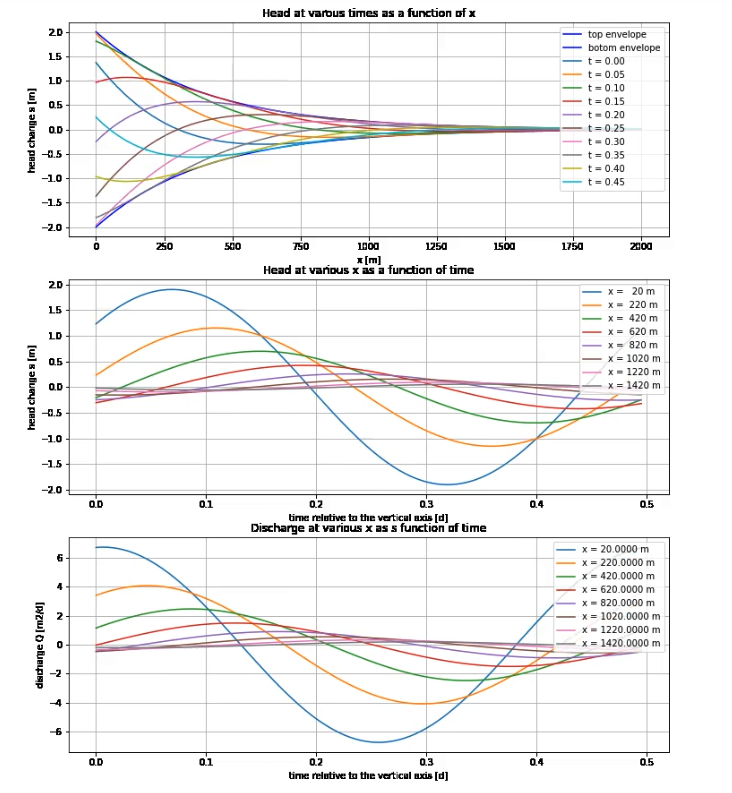

## A river whose level fluctuates according to a sine function

The analytical solution is given by (see syllabus)

$$s = A e^{-a x} \sin(\omega t - a x + \theta)$$

Give the envelopes between which the head will fluctuate due to only this wavy head fluctuations at $x=0$

Show the wave in the aquifer at a number of times using the following variable values:

$kD = 500\,  m2/d$, the aquifer's transmissivity

$S = 0.001$, the aquifer's storage coefficient

$A  = 2 \, m$, the wave's amplitude

$\omega = 1/\pi \, d^{-1}$, the wave's frequency

$\theta = 0.2/\pi$, the wave's initial time delay

$ a = \sqrt{\frac{\omega}{2}\frac{S}{kD}}$

## importing modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from matplotlib.patches import PathPatch, Path
from IPython.display import HTML, display
import pdb
import os

AND = np.logical_and

# Convenience function to set up a graphic

def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8), fontsize=15):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    ax.grid(True, which='both')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)
    return fig, ax

## Implementation

Animate a set of waves (head) in the subsurface versus x, waves at various $x$ as a function of time and discharge at verious $x$ as a function of time.

<div>
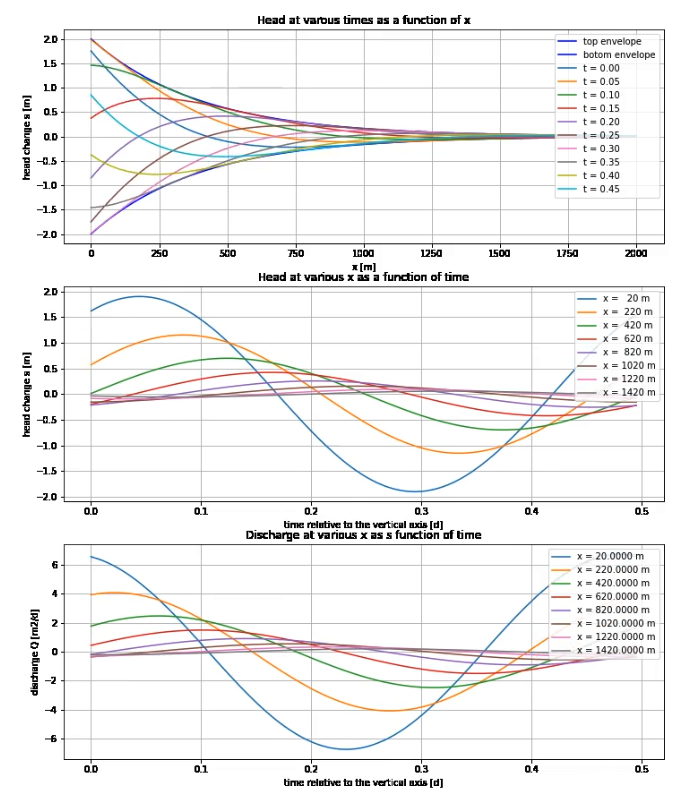
</div>

In [4]:
# Parameters
Tc    = 0.5 # [d] cycle time
omega = 2 * np.pi / Tc  # [1/d] angle velocity randians/day
theta = 0.2 * np.pi    # [-]  initial time delay in radians
S     = 0.001           # [-]   storage coefficient of aquifer
kD    = 1000           # m2/d, transmissivity
A     = 2              # m, sine ampletude
a     = np.sqrt(omega / 2 * S / kD) # 1/m, damping and delay factor
x     = np.linspace(0, 2000, 501)  # m, choose values to compute and show

# Top and bottom envelopes
env1  = +A * np.exp(-a * x)  # top envelope
env2  = -A * np.exp(-a * x)  # bottom envelop

# Macro to compute head change s and the discharge
s = lambda x, t : A * np.exp(-a * x) * np.sin(omega * t - a * x + theta)
Q = lambda x, t : kD * A * a * np.exp(-a * x) * (np.sin(omega * t - a * x + theta) + np.cos(omega * t - a * x + theta))

# Setting up a nice plot with three graphics
fig, axs = plt.subplots(3, 1, sharex=False, sharey=False)
fig.set_size_inches(12, 15)

# The three titles
axs[0].set_title("Head at varous times as a function of x")
axs[1].set_title("Head at various x as a function of time")
axs[2].set_title("Discharge at various x as s function of time")

# The three x axis labels
axs[0].set_xlabel("x [m]")
axs[1].set_xlabel("time relative to the vertical axis [d]")
axs[2].set_xlabel("time relative to the vertical axis [d]")

# The three y axis labels
axs[0].set_ylabel("head change s [m]")
axs[1].set_ylabel("head change s [m]")
axs[2].set_ylabel("discharge Q [m2/d]")

# Grid lines in the three plots
for ax in axs:
    ax.grid()
 
# plot the envelopes in the top axes
axs[0].plot(x, env1, 'b', label='top envelope')
axs[0].plot(x, env2, 'b', label='botom envelope')

# choose values for time (using the cycle time to get a number of cycle times as total)
times1 = np.linspace(0, 1,  11)[:-1] * Tc # Just 10 initial values for the waves
times2 = np.linspace(0, 1, 101)[:-1] * Tc # 100 times

# Initialize artists to animate
lines=[]

# For time nr i, update the lines in the three plots
def plotall(i, dt, update=False):
    """Plot or update the lines in each of the three graphs using the same count and time step.
    
    Parameters
    ----------
    i: int
        time step number
    dt: float
        time step length    
    update: bool
        update is False only before thr simulation to generate the lines and the legend.
        During the simluation update as always to True, so that only the data are replaced.
    """    
    iline = 0  #  line/artist counter to keep track of line to update
    
    # First plot, it has 10 lines, 10 times, i * dt + [0.0, 0.1, 0.2, ... 1.0] Tcycle
    for ti in times1:    
        if not update:      # A new line is generated (done beore the animation)
            line, = axs[0].plot(x, s(x, ti +  i * dt), label=f't = {ti + dt:.2f}')
            lines.append(line) # keep the line
        else: # only update the y-values (during the animation)
            lines[iline].set_data(x, s(x, ti +  i * dt))
        iline += 1

    # line in the second and third plot as a function of time for verious x values
    times = times2 + i * dt # The times
    
    for xi in np.arange(20, 1500, 200): # The x values
        
        # Line in second axes
        if not update: # plot a new line (ahead of the animation)
            line, =axs[1].plot(times2 , s(xi, times), label='x = {:4.0f} m'.format(xi))
            lines.append(line)
        else: # during the animation
            lines[iline].set_data(times2, s(xi, times))
        iline += 1
        
        # Line in third axis
        if not update: # plot a new line ahead of the animation
            line, =axs[2].plot(times2, Q(xi, times), label='x = {:.04f} m'.format(xi))
            lines.append(line)
        else: # during the animation
            lines[iline].set_data(times2, Q(xi, times))
        iline += 1
        
    return lines # all generated or updated artists (lines)


# Ahead of the animation generate all the lines
plotall(0, 0, False)

# Generate all the legends
for ax = axs:
    ax.legend(loc="upper right")

# The animation
def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i, dt, update):
    plotall(i, dt, update)
    return lines

anim = FuncAnimation(fig, animate, frames=100, fargs=(Tc / 100, True), init_func=init,
                        interval=100, blit=True, repeat=True)

print('Animating ... please wait a minit till all frames are ready.")

plt.close(anim._fig)

if True: # show the animation result
    out = HTML(anim.to_html5_video())
    display(out) # to actually show the video.
      
else: # save to .mp4 file and convert mp4 file to a self-repeating .gif file
    fname1 = "SinesWavesHeadDischarge.mp4"
    fname3 = "SinesWavesHeadDischarge.gif"
    anim.save(fname1, fps=15, extra_args=['-vcodec', 'libx264'])
    
    !ffmpeg -i $fname1 -y $fname2
    os.getcwd()

Done!


# Animate a single wave between its envelopes

Siple case, of a single wave driven by sine-type fluctuation at $x=0$.

<div>
   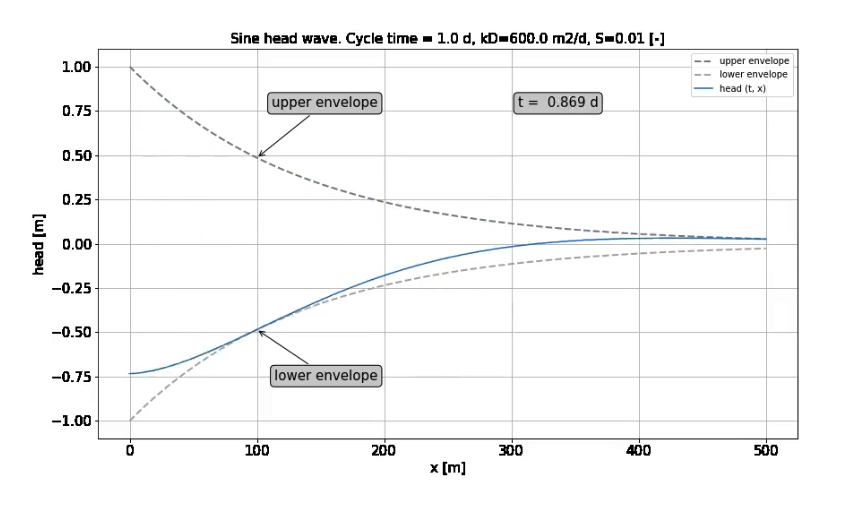
</div>

In [5]:
# Parameters
A, kD, S, T_cycle = 2.0, 600., 0.01, 1.0
omega = 2 * np.pi / T_cycle
a = np.sqrt((omega * S) / (2 * kD))
times = T_cycle * np.linspace(0, 1, 100)[:-1] # Times within a single cycle

# Macros to compute head change and envelopes
y   = lambda x, t: np.exp(-a * x) * np.sin(omega * t - a * x)
env = lambda x: np.exp(-a * x)

# New figure with setup
fig, ax = newfig("Sine head wave. Cycle time = {} d, kD={} m2/d, S={} [-]".format(T_cycle, kD, S),
           "x [m]", "head [m]")

# x coordinates used in the visualization
x = np.linspace(0, 500, 501)

# Plot the two envelopes
ax.plot(x, +env(x), '--', lw=2, color='gray',      label="upper envelope")
ax.plot(x, -env(x), '--', lw=2, color='darkgray', label="lower envelope")

# Annotate the envelopes
bbox = dict(boxstyle="round", fc="0.8")
ax.annotate('upper envelope', xy=(100, env(100)), ha='right', xytext=(0.4, 0.85), textcoords='axes fraction',
            fontsize=15, arrowprops=dict(arrowstyle='->'), bbox=bbox)
ax.annotate('lower envelope', xy=(100, -env(100)), ha='right', xytext=(0.4, 0.15), textcoords='axes fraction',
            fontsize=15, arrowprops=dict(arrowstyle='->'), bbox=bbox)

# Plot the text box to show the siulation time
txt   = ax.text(0.6, 0.85, '', transform=ax.transAxes, fontsize=15, bbox=bbox)

# Initially draw the wave
t = 0.
line, = ax.plot(x,  np.exp(-a * x) * np.sin(omega * t - a * x), label="head (t, x)")
ax.legend(loc="upper right")

# Animation
def init():
        line.set_data([], [])
        txt.set_text("")
        return line, txt
        
def animate(t, a, omega, x):
        line.set_data(x, np.exp(-a * x) * np.sin(omega * t - a * x))
        txt.set_text('t = {:6.3} d'.format(t))
        return line, txt

# Animate
anim = FuncAnimation(fig, animate, frames=times, fargs=(a, omega, x), init_func=init,
                        interval=20, blit=True, repeat=True)

print('Animating ... please wait a minit till all frames are ready.")

plt.close(anim._fig)

if True:
    out = HTML(anim.to_html5_video())
    display(out)
else:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=-1,
                    extra_args=['-vcodec', 'libx264'])

    fname1 = "SingleSineWave.mp4"
    fname1 = "SingleSineWave.gif"
    anim.save(fname1 , writer=writer)
    
    # Convert the mp4 into a self-repeating gif file
    !ffmpeg -i $fname1 -y $fname2

# Superposition of a number of waves having different amplitudes, cycle times and values at t=0

Same setup as bovfore, but now we will superimpose a number (3) waves with different frequency, amplitude and initial values.

A pandas DataFrame will be used to store the wave data, so that an arbitrary number of waves can be superpomposed without changing the code.

<div>
   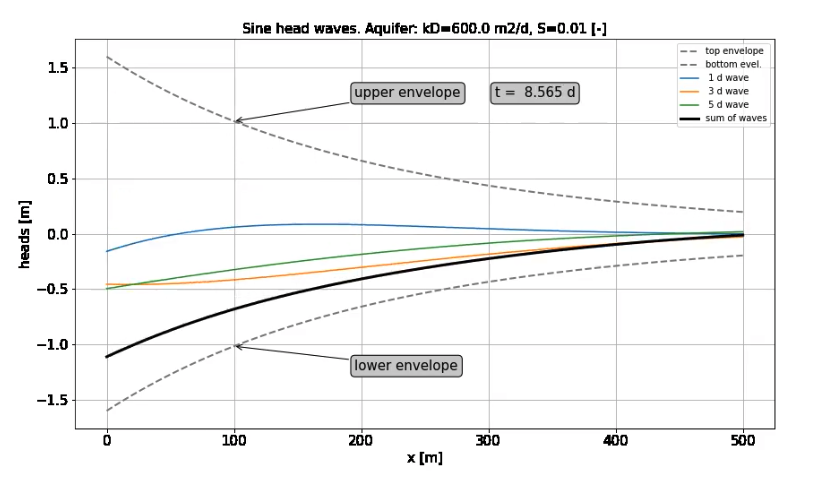
</div>

In [17]:
import pandas as pd

# Aquifer properties
A, kD, S, = 2.0, 600., 0.01

# Set up the wave data
columns = ['A', 'T_cycle', 'beta', 'label']
data = [[0.4, 1,  0.0, ' 1 d wave'],
        [0.7, 3,  0.2, ' 3 d wave'],
        [0.5, 5,  0.1, ' 5 d wave']]

# Put the wave data in a DataFrame
cdata = pd.DataFrame(data, columns=columns)

# Add further wave properties as columns to the DataFrame

# Angular velocity (depends on cycle time)
cdata['omega'] = 2 * np.pi / cdata['T_cycle']

# The dammpoing factor
cdata['a']     = np.sqrt((cdata['omega'] * S) / (2 * kD))
         
    
# Times to be used in the simluation
times = np.linspace(0, 15, 15 * 24)  # 15 days subdivided in 15 x 24 steps (hourly steps)

def y(t=None, x=None, cdata=None, index=None):
    """Return wave or combined waves at time t.
    
    Parameters
    ----------
    t: float
        time
    x: ndarray of floats
        x coordinates
    cdata: pd.DataFrame
        the properties of the waves (one line per wave)
    index: cdata.index
        in fact the wave numbers
    """
    index = [index] if index is not None else cdata.index 
    y_ = np.zeros_like(x)
    for i in index:
        rec = cdata.loc[i]
        dy = rec['A'] * np.exp(- rec['a'] * x)
        if t is not None:
            dy *= np.sin(rec['omega'] * t - rec['a'] * x + rec['beta'])
        y_ += dy
    return y_
         
def y_env(x, cdata=None):
    "Return top envelope of combined waves."
    if np.isscalar(x):
        x = np.array([x], dtype=float)
    return y(x=x, cdata=cdata)

# Set up the figure
fig, ax = newfig("Sine head waves. Aquifer: kD={} m2/d, S={} [-]".format(kD, S),
           "x [m]", "heads [m]")

# x coordinates in the simulatoiin
x = np.linspace(0, 500, 501)

# Plot the envolopes
ax.plot(x, + y_env(x, cdata), '--', lw=2, color='gray', label='top envelope')
ax.plot(x, - y_env(x, cdata), '--', lw=2, color='gray', label='bottom evel.')

# Annotate the two envolopes
bbox = dict(boxstyle="round", fc="0.8")
ax.annotate('upper envelope', xy=(100, +y_env(100, cdata)), xytext=(0.4, 0.85), textcoords='axes fraction',
            fontsize=15, arrowprops=dict(arrowstyle='->'), bbox=bbox)
ax.annotate('lower envelope', xy=(100, -y_env(100, cdata)), xytext=(0.4, 0.15), textcoords='axes fraction',
            fontsize=15, arrowprops=dict(arrowstyle='->'), bbox=bbox)

# Initialize the ext in the box to show the time during the animation
txt   = ax.text(0.6, 0.85, '', transform=ax.transAxes, fontsize=15, bbox=bbox)
        
# Generate the artists to be used in the animation
lines = []
for i in cdata.index:
         line, = ax.plot(x, y(0, x, cdata, i), label=cdata['label'].loc[i])
         lines.append(line)

# Generate the initial superimposed total head
tot_line, = ax.plot(x, y(0, x, cdata), color='black', lw=3, label="sum of waves")
    
# Plot the legend
ax.legend(loc="upper right")

# Animation
def init():
        for line in lines:
            line.set_data([], [])
        tot_line.set_data([], [])
        txt.set_text("")
        return (*lines, tot_line, txt) # The artists to be animated
        
def animate(t, a, omega, x):
        for line, i in zip(lines, cdata.index):
            line.set_data(x, y(t=t, x=x, cdata=cdata, index=i))
        tot_line.set_data(x, y(t=t, x=x, cdata=cdata))
        txt.set_text('t = {:6.3f} d'.format(t))
        return (*lines, tot_line, txt) # Return the animated artists

# Animate
anim = FuncAnimation(fig, animate, frames=times, fargs=(a, omega, x), init_func=init,
                interval=50, blit=True, repeat=True)

print('Animating ... please wait a minit till all frames are ready.")

plt.close(anim._fig)

if True: # only show
    out = HTML(anim.to_html5_video())
    display(out)
else: # save as .mp4 ovie and as self-repeating .gif file
    fname1 = "MultipleSineWaves.mp4"
    fname1 = "MultipleSineWaves.gif"

    anim.save(fname1, fps=15, extra_args=['-vcodec', 'libx264'])

    !ffmpeg -i $fname1 -y $fname2

# Sine wave in context of the aquifer system

Here the wave is simulated within the aquifer. So the aquifer system is drawn first. Then the simulated/animated head is drawn in its own axes within thie aquifer system.

### Fucntions define next serve the following tasks
    1) for computing drawdown and evelopes
    2) putting an axis on an exact position in the figure
    3) define a rectangle PathPatch that can be animated
    4) define a a function that returs the updated path of a rectangle

In [11]:
# Computing the drawdown
def ddn(x=None, A=None, a=None, theta=None, theta0=0):
    """Return drawdown for given theta, x, A and a.
    
    Parameters
    ----------
    x : ndarray of floats
        x coordinates
    A : float
        wave amplitude
    a : float
        damping factor (sqrt(omega / 2 * s / kD))
    theta: float or None
        angle of sine ( = omega t) does not include delay and initial angle
        If None, then the positive envelope is returnede
    theta0: float default = 0
        angle of theta for t == 0
    """
    if theta is None:
        return A * np.exp(-a * x)
    else:
        return A * np.exp(-a * x) * np.sin(theta - a * x + theta0)



# Generate the figure position of the position specified within the given axes
def bbox2figure(x0=None, y0=None, h=None, w=None, ax=None):
    """Convert given position within ax to figure fraction position."""
    xy = [[x0, y0], [x0 + h, y0 + w]]
    uvDisp = ax0.transData.transform(xy) # Data --> Display
    uvFig  = ax0.figure.transFigure.inverted().transform(uvDisp) # Display to figure
    return uvFig[0][0], uvFig[0][1], uvFig[1][0] - uvFig[0][0], uvFig[1][1] - uvFig[0][1]


# Define a rectangle PathPatch that can (must not) be animated
def rect(x0=None, y0=None, w=None, h=None, **kw):
    """Return a rectangle patch."""
    return PathPatch(Path([[x0, y0],
                         [x0 + w, y0],
                         [x0 + w, y0 + h],
                         [x0, y0 + h],
                         [x0, y0]], codes=[1, 2, 2, 2, 79]), **kw)
   
# Generate a new rectangle path with the updated height of the blue surface water patch (Lake or sea)
def set_path(path, x0, y0, w, h):
    """Update the height of a rectangle PathPatch."""
    path.vertices = np.array([[x0, y0], [x0 + w, y0], [x0 + w, y0 + h], [x0, y0 + h], [x0, y0]])
    return path


## Sine wave

<div>
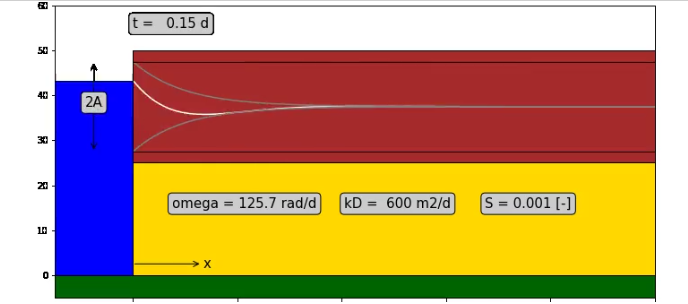
</div>

In [12]:
Tcycle0 = 0.5
A, kD, S, Tcycle = 10.0, 600, 0.001, Tcycle0 / 10

# Define the aquifer and tide properties
Aquif = dict(A=A, kD=kD, S=S, Tcycle=Tcycle)
Aquif['omega'] = 2 * np.pi / Aquif['Tcycle']
Aquif['a'] = np.sqrt(Aquif['omega'] / 2 * Aquif['S'] / Aquif['kD'])

# Define the relevant elevations
hbase, haquif, haclude, hlake0= 5, 25, 25, 37.5

# Width of the sea and width of the aquifer
L0, L1 = 150, 1000

# Define x coordinates
x = np.linspace(0, L1, 101)


# Parameterize the rectangles that constitute the drawing
params = {'base' : dict(x0=-L0, y0=0, w=L0 + L1, h=-hbase, fc='darkgreen'),
          'aquif': dict(x0=  0, y0=0, w=L1, h=haquif, fc='gold'),
          'aclud': dict(x0=  0, y0=haquif, w=L1, h=haclude, fc='brown'),
          'lake' : dict(x0=-L0, y0=0, w=L0, h=hlake0, fc='blue'),
         }

# Generate the rectangles that constitute the essence of the background figure
base    = rect(**params['base'])
aquif   = rect(**params['aquif'])
aclud   = rect(**params['aclud'])
lake    = rect(**params['lake'])

# Things (list of patches) that define the drawing
things = [base, aquif, aclud, lake]

# Generate a new fig and axis of the desired size
fig, ax0 = plt.subplots(); fig.set_size_inches(12, 6)

# Add the rectangles to the axes
for thing in things:
    ax0.add_patch(thing)
    
# Properties of the main axes of the figure
ax0.set_xlim((-L0, L1))  # L0 is the width of the lake, L1 that of the visible aquifer
ax0.set_ylim((-hbase, haquif + haclude + 10))
ax0.set_fc("none") # Axes rectangle is now transparent

# Props for a gray bbox that will be used to display values of paameters in the figure
# bbox can be used several times
bbox = dict(boxstyle="round", fc="0.8")

# Arrow with the 'x'
ax0.annotate('x', (0, 0.1 * haquif),
            ha='right', xytext=(L0, 0.1 * haquif), textcoords='data', va='center',
            fontsize=15, arrowprops=dict(arrowstyle='<-'))

# double arrow showing the 2 amplitude (A = Aquif['A'])
ax0.annotate('', (  -L0/2, hlake0 - Aquif['A']),
            xytext=(-L0/2, hlake0 + Aquif['A']), textcoords='data', va='center',
            fontsize=15, arrowprops=dict(arrowstyle='<->'))

# Place the text '2A' in the middle of the double arrow in its gray bbox
ax0.text(-L0/2, hlake0, '2A', ha='center', fontsize=15, bbox=bbox)

# Place the text "omega =..., kD=... m2/s, S= ... in the axes with a gray bbox"
txt_o = ax0.text(0.5 * L0, 0.6 * haquif, 'omega ={:.0f} rad/d'.format(Aquif['omega']), fontsize=15, bbox=bbox)
txt_k = ax0.text(2.7 * L0, 0.6 * haquif, 'kD={:.0f} m2/d'.format(Aquif['kD']), fontsize=15, bbox=bbox)
txt_S = ax0.text(4.5 * L0, 0.6 * haquif, 'S={:.2f} [-]'.format(Aquif['S']), fontsize=15, bbox=bbox)

# Define x oordinates within the visible aquifer only
x = np.linspace(0, L1, 400)

# Max time is a number of cycle times
ncycle = 1 # Number of cycle times before repeating
points_per_cycle = 72 # Number of points per time cycle
tmax = ncycle * Tcycle0 # Aquif['Tcycle']

# Define times within the cycle time
tfrac = np.linspace(0,  ncycle, ncycle * points_per_cycle)
times  =  tfrac * tmax

# The angle for the sin for each time
theta = np.hstack((times[0], np.cumsum(np.diff(times) * Aquif['omega'])))

# The resulting elevation of the lake level at each time
dhlake = Aquif['A'] * np.sin(theta)

tdata = pd.DataFrame({'theta': theta, 'dhlake': dhlake}, index=times)

# Set up the siulation subaxes, Place it at the correct location within the figure.
# Note hat position argument within subplot always specifies coordinates in fraction of fig extent
ax1 = fig.add_subplot(position=bbox2figure(0, hlake0 - Aquif['A'], L1, 2 * Aquif['A'], ax=ax0))
ax1.set_xlim((0, L1))
ax1.set_ylim((-Aquif['A'], Aquif['A']))
ax1.set_fc("none") # transparent
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# need to set frame to invisible? How?

# Plot the sine wave line for the first time and the top and bottom envelopes
line,   = ax1.plot(x, + ddn(x=x, A=Aquif['A'], a=Aquif['a'], theta=0), color='w')
envtop, = ax1.plot(x, + ddn(x=x, A=Aquif['A'], a=Aquif['a']), color='gray')
envbot, = ax1.plot(x, - ddn(x=x, A=Aquif['A'], a=Aquif['a']), color='gray')

# Update the time, place the initial time in its bbox
txt_t = ax0.text(0, haquif + haclude + 5, "t = {:6.3f} d".format(0), fontsize=15, bbox=bbox)

# Animation

# Initialize, specifying the artists to be used in the animation)
def init():
    path = lake.get_path()  # the path of the lake patch
    path.vertices = []
    lake.set_path(path)     # set lake path to empty
    line.set_data([], [])   # exmpty wave line
    envtop.set_data([], []) # empty top envelope
    envbot.set_data([], []) # empyt bottom envelope
    txt_t.set_text("")
    txt_o.set_text("")
    txt_k.set_text("")
    txt_S.set_text("")
    return lake, line, envtop, envbot, txt_t, txt_o, txt_k, txt_S

# Animation function, updating t_hlake in each step
def animate(t):
    global tdata, x, Aquif
    rec = tdata.loc[t]
    path = lake.get_path()
    lake.set_path(set_path(path, -L0, 0, L0, hlake0 + rec['dhlake']))
    line.set_data(x, ddn(x=x, A=Aquif['A'], a=Aquif['a'], theta=rec['theta']))
    envtop.set_data(x, + ddn(x=x, A=Aquif['A'], a=Aquif['a']))
    envbot.set_data(x, - ddn(x=x, A=Aquif['A'], a=Aquif['a']))    
    txt_t.set_text("t = {:6.2f} d".format(t))
    txt_o.set_text('omega = {:5.1f} rad/d'.format(Aquif['omega']))
    txt_k.set_text('kD = {:4.0f} m2/d'.format(Aquif['kD']))
    txt_S.set_text('S = {:5.3f} [-]'.format(Aquif['S']))
    return lake, line, envtop, envbot, txt_t, txt_o, txt_k, txt_S

# Animate, no extra arguments required.
anim = FuncAnimation(fig, animate, frames=tdata.index, fargs=None, init_func=init,
                    interval=30, blit=True, repeat=True)

print('Animating ... please wait a minit till all frames are ready.")

plt.close(anim._fig)  # Delete the first axes not used during the animation.

if True:
    out = HTML(anim.to_html5_video()) # To save the file switch off
    display(out)
else: # save movie as .mp4 and as a self-repeating .gif file
    # Save the animation (don't generate out if you do)
    omega = Aquif['omega']
    print("omega={:.1f}, kD={:.0f}, S={:.3f}".format(omega, kD, S))

    fname = "SineWaveInContext_omega{:.1f}kD{:.0f}S{:.3f}".format(omega, kD, S)
    fname = fname.replace('.','_')
    fname1 = fname + '.mp4'
    fname2 = fname + '.gif'
    anim.save(fname1, fps=20, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.") # Shows the number of frames saved.
    
    # Convert the generated '.mp4' into a '.gif' file for automated repeated running outside Jupyter
    !ffmpeg -i $file1 -y $file2

# Animatie sine wave with multiple episodes

The idea is that the time is subdivided in multiple episodes allowing to also show the effect of the parameters omega, kD and S.

<div>
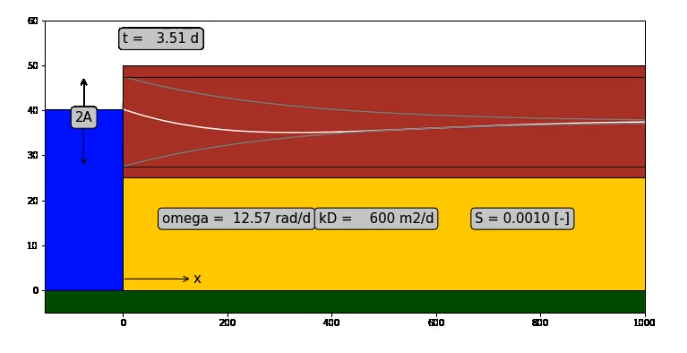
</div>

In [35]:
# Define the aquifer and tide properties
Aquif = dict(A=10.0, kD=600, S=0.001, Tcycle=0.5)
Aquif['omega'] = 2 * np.pi / Aquif['Tcycle']
Aquif['a'] = np.sqrt(Aquif['omega'] * Aquif['S'] / 2 / Aquif['kD'])

# Define the relevant elevations
hbase, haquif, haclude, hlake0= 5, 25, 25, 37.5

# Width of the sea and width of the aquifer
L0, L1 = 150, 1000

# Define x coordinates
x = np.linspace(0, L1, 101)

def rect(x0=None, y0=None, w=None, h=None, **kw):
    """Return a rectangle patch."""
    return PathPatch(Path([[x0, y0],
                         [x0 + w, y0],
                         [x0 + w, y0 + h],
                         [x0, y0 + h],
                         [x0, y0]], codes=[1, 2, 2, 2, 79]), **kw)
   
# To update the height of the blue surface water patch
def set_path(path, x0, y0, w, h):
    """Updat the height of a rectangle PathPatch."""
    path.vertices = np.array([[x0, y0], [x0 + w, y0], [x0 + w, y0 + h], [x0, y0 + h], [x0, y0]])
    return path
 

# Parameterize the rectangles that constitute the drawing
params = {'base' : dict(x0=-L0, y0=0, w=L0 + L1, h=-hbase, fc='darkgreen'),
          'aquif': dict(x0=  0, y0=0, w=L1, h=haquif, fc='gold'),
          'aclud': dict(x0=  0, y0=haquif, w=L1, h=haclude, fc='brown'),
          'lake' : dict(x0=-L0, y0=0, w=L0, h=hlake0, fc='blue'),
         }

# Generate these rectangles
base    = rect(**params['base'])
aquif   = rect(**params['aquif'])
aclud   = rect(**params['aclud'])
lake    = rect(**params['lake'])

# Things that define the drawing
things = [base, aquif, aclud, lake]

# Generate a new fig and axis of the desired size
fig, ax0 = plt.subplots(); fig.set_size_inches(12, 6)

# Add the rectangles to the axes
for thing in things:
    ax0.add_patch(thing)
    
# Axes properties
ax0.set_xlim((-L0, L1))
ax0.set_ylim((-hbase, haquif + haclude + 10))
ax0.set_fc("none") # Axes rectangle is now transparent


# Props for a gray bbox
bbox = dict(boxstyle="round", fc="0.8")

# Arrow with the 'x'
ax0.annotate('x', (0, 0.1 * haquif),
            ha='right', xytext=(L0, 0.1 * haquif), textcoords='data', va='center',
            fontsize=15, arrowprops=dict(arrowstyle='<-'))
# double arrow showing the 2 amplitude (A = Aquif['A'])
ax0.annotate('', (  -L0/2, hlake0 - Aquif['A']),
            xytext=(-L0/2, hlake0 + Aquif['A']), textcoords='data', va='center',
            fontsize=15, arrowprops=dict(arrowstyle='<->'))

# Place the text '2A' in the middle of the double arrow in its gray bbox
ax0.text(-L0/2, hlake0, '2A', ha='center', fontsize=15, bbox=bbox)

# Place the text "kD=... m2/s, S= ..."
txt_o = ax0.text(0.5 * L0, 0.6 * haquif, 'omega ={:.0f} rad/d'.format(Aquif['omega']), fontsize=15, bbox=bbox)
txt_k = ax0.text(2.5 * L0, 0.6 * haquif, 'kD={:.0f} m2/d'.format(Aquif['kD']), fontsize=15, bbox=bbox)
txt_S = ax0.text(4.5 * L0, 0.6 * haquif, 'S={:.2f} [-]'.format(Aquif['S']), fontsize=15, bbox=bbox)

# Define x oordinates within aquifer
x = np.linspace(0, L1, 400)


# Define the time data, episodes and values through time

# Max time is one cycle time
n_episode   = 4   # number of episodes
n_cycle_epi = 3 # number of Tcycles per episode to simulate
n_per_cycle = 24 # number of points per Tcycle

# Define times within the cycle time
tmax  = n_episode * n_cycle_epi * n_per_cycle * Aquif['Tcycle']
tfrac = np.linspace(0,  1, n_episode * n_cycle_epi * n_per_cycle)
times = tfrac * tmax

episode = np.zeros_like(tfrac, dtype=int)
N = n_cycle_epi * n_per_cycle
for ie in range(n_episode):    
    episode[ie * N:] = ie
    
# fill in what data to be used for each episode
M = n_cycle_epi * n_per_cycle
factor = np.sin(2 * np.pi * np.arange(M) / M) * 3 / 4 + 1.25 # 0.5 < factor < 2.0 

tdata = pd.DataFrame(episode, index=times, columns=['episode'])
tdata['omega'] = Aquif['omega']; tdata.loc[episode==1, 'omega'] *= factor 
tdata['kD']    = Aquif['kD'];    tdata.loc[episode==2, 'kD'] *= factor
tdata['S']     = Aquif['S'];     tdata.loc[episode==3, 'S'] *= factor

# The angle for the sin for each time
tdata['theta'] = np.hstack((times[0], np.cumsum(np.diff(times)))) / tdata['omega']

# The damping factor
tdata['a']= np.sqrt(tdata['omega'] / 2 * tdata['S'] / tdata['kD'])

# The resulting elevation of the lake level at each time
tdata['dhlake'] = Aquif['A'] * np.sin(tdata['theta'])

# Set up the siulation axis, Place it at the correct location within the figure.
# position arg within subplot always specifies it in terms of figure fraction
ax1 = fig.add_subplot(position=bbox2figure(0, hlake0 - Aquif['A'], L1, 2 * Aquif['A'], ax=ax0))
ax1.set_xlim((0, L1))
ax1.set_ylim((-Aquif['A'], Aquif['A']))
ax1.set_fc("none")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

# Plot the line for the first time
line,   = ax1.plot(x,   ddn(x=x, A=Aquif['A'], a=Aquif['a'], theta=0), color='w')
envtop, = ax1.plot(x, + ddn(x=x, A=Aquif['A'], a=Aquif['a']), color='gray')
envbot, = ax1.plot(x, - ddn(x=x, A=Aquif['A'], a=Aquif['a']), color='gray')

# Update the time, place the initial time in its bbox
txt_t = ax0.text(0, haquif + haclude + 5, "t = {:6.3f} d".format(0), fontsize=15, bbox=bbox)

# Animation

# Initialize (in fact blank lines, and specifying the artists to be used in the animation)
def init():
    path = lake.get_path()
    path.vertices = []
    lake.set_path(path)
    line.set_data([], [])
    envtop.set_data([], [])
    envbot.set_data([], [])
    txt_t.set_text("")
    txt_o.set_text("")
    txt_k.set_text("")
    txt_S.set_text("")
    return lake, line, envtop, envbot, txt_t, txt_o, txt_k, txt_S

# Animation function, updating t_hlake in each step
def animate(t):
    global tdata
    rec = tdata.loc[t]
    path = lake.get_path()
    lake.set_path(set_path(path, -L0, 0, L0, hlake0 + rec['dhlake']))
    line.set_data(x, ddn(x=x, A=Aquif['A'], a=rec['a'], theta=rec['theta']))
    envtop.set_data(x, + ddn(x=x, A=Aquif['A'], a=rec['a']))
    envbot.set_data(x, - ddn(x=x, A=Aquif['A'], a=rec['a']))
    txt_t.set_text("t = {:6.2f} d".format(t))
    txt_o.set_text("omega = {:6.2f} rad/d".format(rec['omega']))
    txt_k.set_text("kD = {:6.0f} m2/d".format(rec['kD']))
    txt_S.set_text("S = {:6.4f} [-]".format(rec['S']))
    return lake, line, envtop, envbot, txt_t, txt_o, txt_k, txt_S

# Animate, no extra arguments required.
anim = FuncAnimation(fig, animate, frames=tdata.index, fargs=None, init_func=init,
                    interval=50, blit=True, repeat=True)

print('Animating ... please wait a minit till all frames are ready.")

plt.close(anim._fig)  # Delete the first axes not used during the animation.

if True: # Show the simulation on screen
    out = HTML(anim.to_html5_video()) # To save the file switch off
    display(out)
else: # save
    fname1 = "SineMultipleEpisodesInContext.mp4"
    fname2 = "SineMultipleEpisodesInContext.gif"
    anim.save(fname1, fps=20, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.") # Shows the number of frames saved.
    
    !ffmpeg -i S$fname1 -y $fname2
    print(os.getcwd())

# Temperature in the subsurface driven by a fluctuating temperature at ground suface (without groundwater flow)

We have to replace head $h$ by temperature $T$, transmissivity $kD$ by heat conductivity $\lambda \,\, \left[\frac{W}{m^2} / \frac{K}{m}\right] \rightarrow \left[\frac{W}{m K}\right]$ and the storage coefficient $S$ by heat capacity $\rho c \,\, \left[\frac{kg}{m^3}\frac{J}{kg K}\right] \rightarrow \left[\frac{J}{m^3 K}\right]$.The dimension of the diffusivity $\frac{kD}{S} \rightarrow \frac{\lambda}{\rho c}$ remains the same, i.e $\left[\frac{J}{s\, m \, K} / \frac{J}{m^3 K}\right] \rightarrow \left[\frac{m^2}{s}\right]$ or $\left[\frac{m^2}{d}\right]$.



<div>
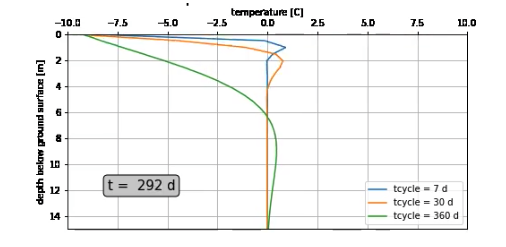
</div>

In [8]:
def temp(DT=None, z=None, a=None, theta=None, theta0=0):
    """Return temperature or the envelope."""
    if theta is None:
        return DT * np.exp(-a * z)
    else:
        return DT * np.exp(-a * z) * np.sin(theta - a * z + theta0)

# Data
por = 0.35
DT, lam, rhoc, z_end = 10.0, 3 * 86400, por * 1000 * 4018 + (1 - por) * 2650 * 800, 15

Tcycles = np.array([7, 30, 360]) # cycle times in days
omegas  = 2 * np.pi / Tcycles # Radians / day

# Props for a gray bbox that will be used to display values of paameters in the figure
# bbox can be used several times
bbox = dict(boxstyle="round", fc="0.8")

# Define x oordinates within the visible aquifer only
z = np.linspace(0, z_end, 100)

# Define times within the cycle time
tmax = Tcycles[-1]
tfrac = np.linspace(0,  1, int(tmax * 1))
times  =  tfrac * tmax

# Data frame with theta for each wave.
tdata = pd.DataFrame(index=times, columns=list(Tcycles))
# The damping / delay factor (the a in A * np.exp(-a x))
dampfacs = np.zeros(len(Tcycles))
for ic, (tc, omega) in enumerate(zip(Tcycles, omegas)):
    dampfacs[ic] = np.sqrt(omega / 2 * rhoc / lam)
    tdata[tc]   = omega * times

# The figure
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
ax.set_title("Temperature fluctuation in subsurface")
ax.set_xlabel("temperature [C]")
ax.set_ylabel("depth below ground surface [m]")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim((-DT, DT))
ax.set_ylim((z_end, 0))
ax.grid()

z = np.linspace(0, z_end, 30)

# Plot the sine wave line for the first time and the top and bottom envelopes
lines = []
for tc, omega, a in zip(Tcycles, omegas, dampfacs):
    rec = tdata.iloc[0]
    lines.append(ax.plot(temp(z=z, DT=DT, a=a, theta=rec[tc]), z, label='tcycle = {:.0f} d'.format(tc))[0])
    #ax.plot(+temp(z=z, DT=DT, a=a), z, color='gray', label='evn for tc={:.0f} d'.format(tc))[0]
    #ax.plot(-temp(z=z, DT=DT, a=a), z, color='gray', label='evn for tc={:.0f} d'.format(tc))[0]

ax.legend(loc='lower right')
    
# Update the time, place the initial time in its bbox
txt_t = ax.text(0.1, 0.2, "t = {:6.3f} d".format(0), transform=ax.transAxes, fontsize=15, bbox=bbox)

# Animation

# Initialize, specifying the artists to be used in the animation)
def init():
    global lines, txt_t
    return lines + [txt_t]

# Animation function, updating t_hlake in each step
def animate(t):
    global lines, txt_t, z, dampfacs, Tcycles, tdata
    rec = tdata.loc[t]
    for tc, a, line in zip(Tcycles, dampfacs, lines):
        line.set_data(temp(z=z, DT=DT, a=a, theta=rec[tc]), z)
    txt_t.set_text("t = {:4.0f} d".format(t))
    return lines + [txt_t]

# Animate, no extra arguments required.
anim = FuncAnimation(fig, animate, frames=tdata.index, fargs=None, init_func=init,
                    interval=30, blit=True, repeat=True)

print('Animating ... please wait a minit till all frames are ready.")

plt.close(anim._fig)  # Delete the first axes not used during the animation.

if True:
    out = HTML(anim.to_html5_video()) # To save the file switch off
    display(out)
else:
    fname1 = "Temp3Waves.mp4"
    fname2 = "Temp3Waves.gif"
    anim.save(fname1, fps=20, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.") # Shows the number of frames saved.
    
    !ffmpeg -i $fname1 -y $fname2